# Section 1 - Introduction

In [1]:
%reset -f

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_excel('/Users/cristianosalvagnin/Documents/GitHub/EUA_Volatility_DII_p/Data/EUA_All_Phases_Daily.xlsx')
df.head()

,Date,EUA
0,2005-04-22,16.85
1,2005-04-25,17.45
2,2005-04-26,17.15
3,2005-04-27,16.35
4,2005-04-28,15.95


In [4]:
target = df['EUA']
target_ = target.values
date = df['Date']

In [5]:
Ph2_date = datetime(2008,4,1)
Ph3_date = datetime(2013,1,2)
Ph4_date = datetime(2021,1,4)

In [6]:
# Fit linear regression model
model = LinearRegression()
model.fit(np.arange(len(target_)).reshape(-1,1), target_)
trend = model.predict(np.arange(len(target_)).reshape(-1,1))

values = range(len(target))


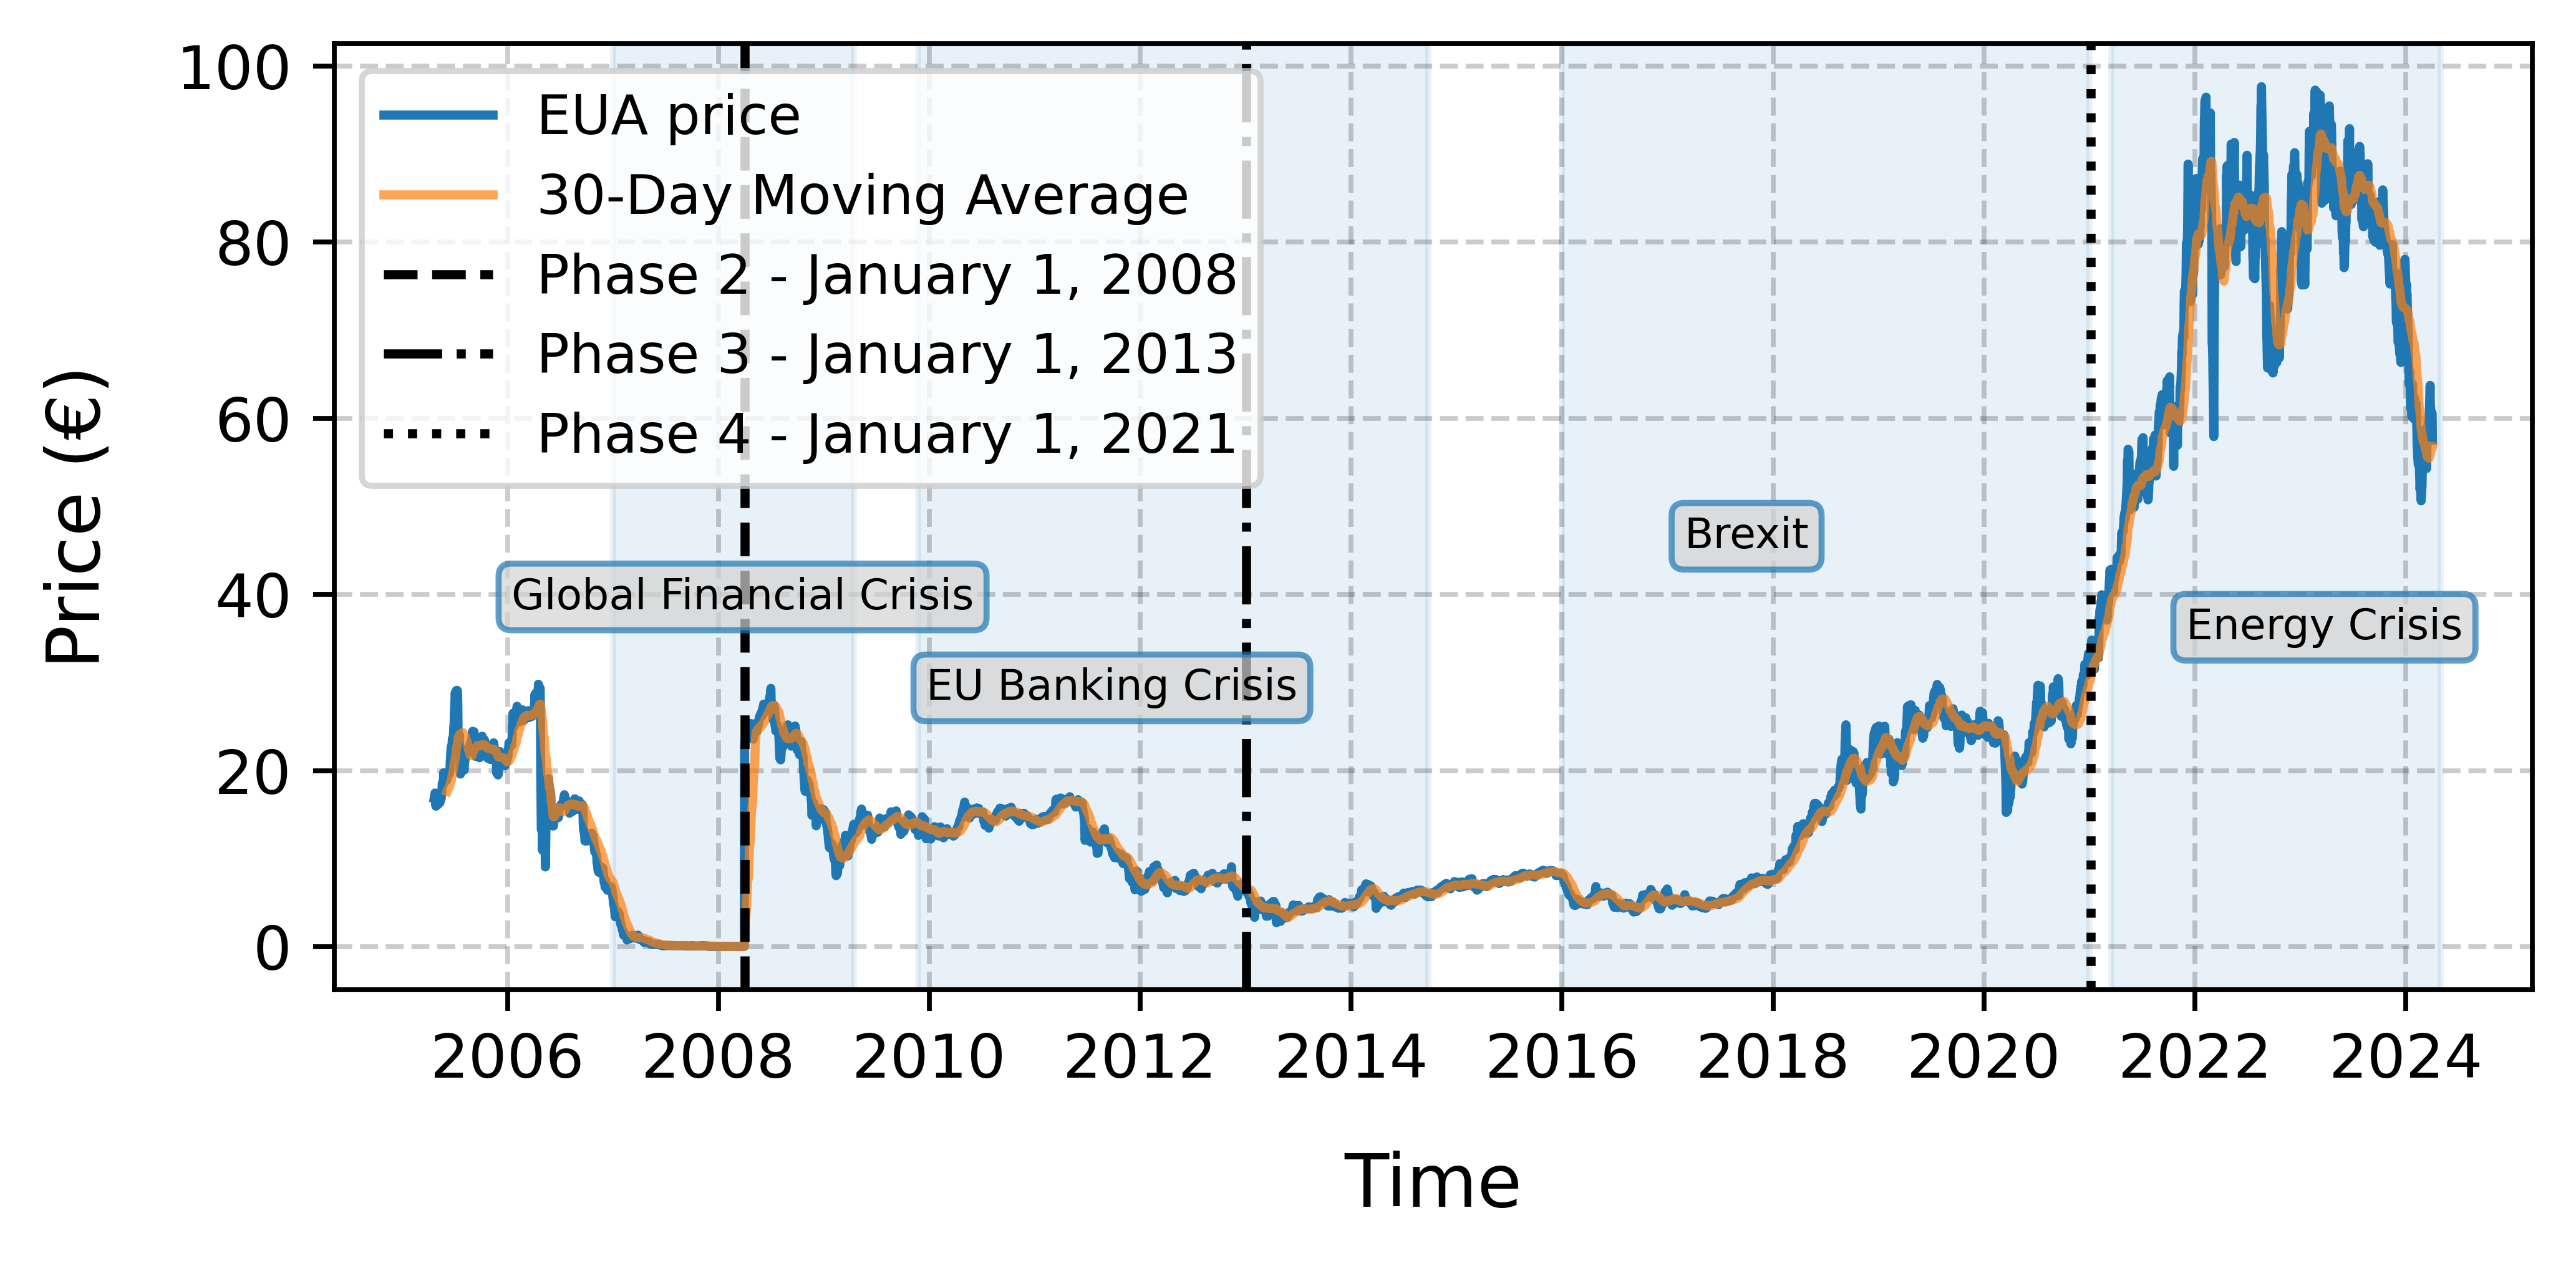

In [7]:
import matplotlib.pyplot as plt
from datetime import datetime

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 3), dpi=700)

# Plot EUA price
ax.plot(date, target, color='tab:blue', label='EUA price')

# Calculate and plot 30-day moving average
df['30_days'] = df['EUA'].rolling(window=30).mean()
ax.plot(date, df['30_days'], color='tab:orange', label='30-Day Moving Average', alpha=0.7)

# Add vertical lines for phases with different line styles
ax.axvline(x=Ph2_date, color='black', linestyle='--', label='Phase 2 - January 1, 2008')  # Dashed line for Phase 2
ax.axvline(x=Ph3_date, color='black', linestyle='-.', label='Phase 3 - January 1, 2013')  # Dash-dot line for Phase 3
ax.axvline(x=Ph4_date, color='black', linestyle=':', label='Phase 4 - January 1, 2021')  # Dotted line for Phase 4

# Add shaded regions with annotations
def add_annotation(ax, label, start_date, end_date, annotate_date, offset):
    ax.axvspan(start_date, end_date, color='tab:blue', alpha=0.1, label=label if annotate_date == start_date else None)
    ax.annotate(label, (annotate_date, 0.5), textcoords="offset points", xytext=(0, offset), ha='center', fontsize=7,
                bbox=dict(boxstyle="round", edgecolor='tab:blue', facecolor='lightgray', alpha=0.7))

add_annotation(ax, 'Global Financial Crisis', datetime(2007, 1, 1), datetime(2009, 4, 15), datetime(2008, 3, 25), 55)
add_annotation(ax, 'EU Banking Crisis', datetime(2009, 11, 22), datetime(2014, 9, 24), datetime(2011, 9, 25), 40)
add_annotation(ax, 'Brexit', datetime(2016, 1, 1), datetime(2020, 12, 31), datetime(2017, 10, 1), 65)
add_annotation(ax, 'Energy Crisis', datetime(2021, 3, 18), datetime(2024, 4, 30), datetime(2023, 3, 25), 50)

# Set axis labels
ax.set_ylabel('Price (€)', fontsize=12, labelpad=10)
ax.set_xlabel('Time', fontsize=12, labelpad=10)

# Add legend
ax.legend(loc='upper left', fontsize=9)

# Add grid
ax.grid(axis='both', color="black", linestyle='--', alpha=0.2)

# Adjust layout for a clean look
plt.tight_layout()

# Uncomment to save the figure
# plt.savefig('/path/to/save/Fig1_EUA_prices_all.png', dpi=700, bbox_inches='tight')

# Show plot
plt.show()


***
Returns
****

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df_r = pd.read_excel('/Users/cristianosalvagnin/Documents/GitHub/EUA_Volatility_DII_p/Data/Dataset_EUA_24_Daily_Returns.xlsx')
print(df_r.head())

        Date       EUA       GPR    VSTOXX  Unc. EUR/USD  Unc. EUR/JPY  \
0 2013-01-03 -0.026562 -0.047370 -0.044808     -0.005952      0.014599   
1 2013-01-04 -0.009631  0.025118 -0.083763      0.029940      0.059952   
2 2013-01-07  0.051864  0.042413  0.046494      0.002907     -0.009050   
3 2013-01-08 -0.029276  0.009784  0.004870      0.000000      0.022831   
4 2013-01-09 -0.039683 -0.168144 -0.044527      0.000000      0.000000   

   Unc. EUR/GBP  Unc. EUR/CHF  Natural Gas  Elec. P. Spain  ...  \
0      0.069869      0.042254     0.013905        0.105128  ...   
1      0.016327      0.006757     0.008154       -0.047067  ...   
2      0.004016      0.020134     0.016544        0.172522  ...   
3      0.000000      0.000000    -0.009042       -0.016019  ...   
4     -0.008000      0.000000     0.010219       -0.029696  ...   

   Low Carbon 100 EU index  MSCI Energy index  ERIX index  EUROnext100  \
0                 0.007788           0.010719    0.022939    -0.001910   
1   

In [10]:
df_v = pd.read_excel('/Users/cristianosalvagnin/Documents/GitHub/EUA-Volatility-Causality/Data/Dataset_EUA_24_Daily_RealizedVolatility.xlsx')
print(df_v.head())

        Date       EUA    VSTOXX  Natural Gas  Copper Fut.  Brent Oil  \
0 2013-01-02 -0.130729  0.330973    -0.350621     1.394739  -0.702824   
1 2013-01-03 -0.129226 -0.687957    -0.366240    -0.435423  -1.028094   
2 2013-01-04 -0.140416  0.783550    -0.467241    -0.964762  -0.787025   
3 2013-01-07 -0.143859 -0.850859    -0.383875    -0.973868  -0.884899   
4 2013-01-08 -0.132438 -0.777857    -0.406960    -1.192364  -0.809947   

   Silver Fut.      Gold  EUR/USD Spot  EUR/JPY Spot  ...  \
0     1.155773  0.140510      0.540161      1.257041  ...   
1     0.982905  0.506696      0.559910      0.851525  ...   
2     0.763569  1.213768     -0.289027      0.895867  ...   
3    -0.258465 -0.206748     -0.109760      0.680976  ...   
4    -0.623376 -0.495686     -0.427477      0.932587  ...   

   WilderHill New Energy  Bloomberg Energy index   Low Carbon 100 EU index  \
0               1.201290                -0.223548                 0.041900   
1               0.599403              

In [11]:
date_r = pd.to_datetime(df_r['Date'])
date_r = date_r.dt.date
print(date_r)

0       2013-01-03
1       2013-01-04
2       2013-01-07
3       2013-01-08
4       2013-01-09
           ...    
2897    2024-03-25
2898    2024-03-26
2899    2024-03-27
2900    2024-03-28
2901    2024-04-01
Name: Date, Length: 2902, dtype: object


In [12]:
date_v = pd.to_datetime(df_v['Date'])
print(date_v)

0      2013-01-02
1      2013-01-03
2      2013-01-04
3      2013-01-07
4      2013-01-08
          ...    
2948   2024-05-16
2949   2024-05-17
2950   2024-05-20
2951   2024-05-21
2952   2024-05-22
Name: Date, Length: 2953, dtype: datetime64[ns]


In [13]:
# compute 30d MA on df_r EUA
df_r['30_days'] = df_r['EUA'].rolling(window=30).mean()


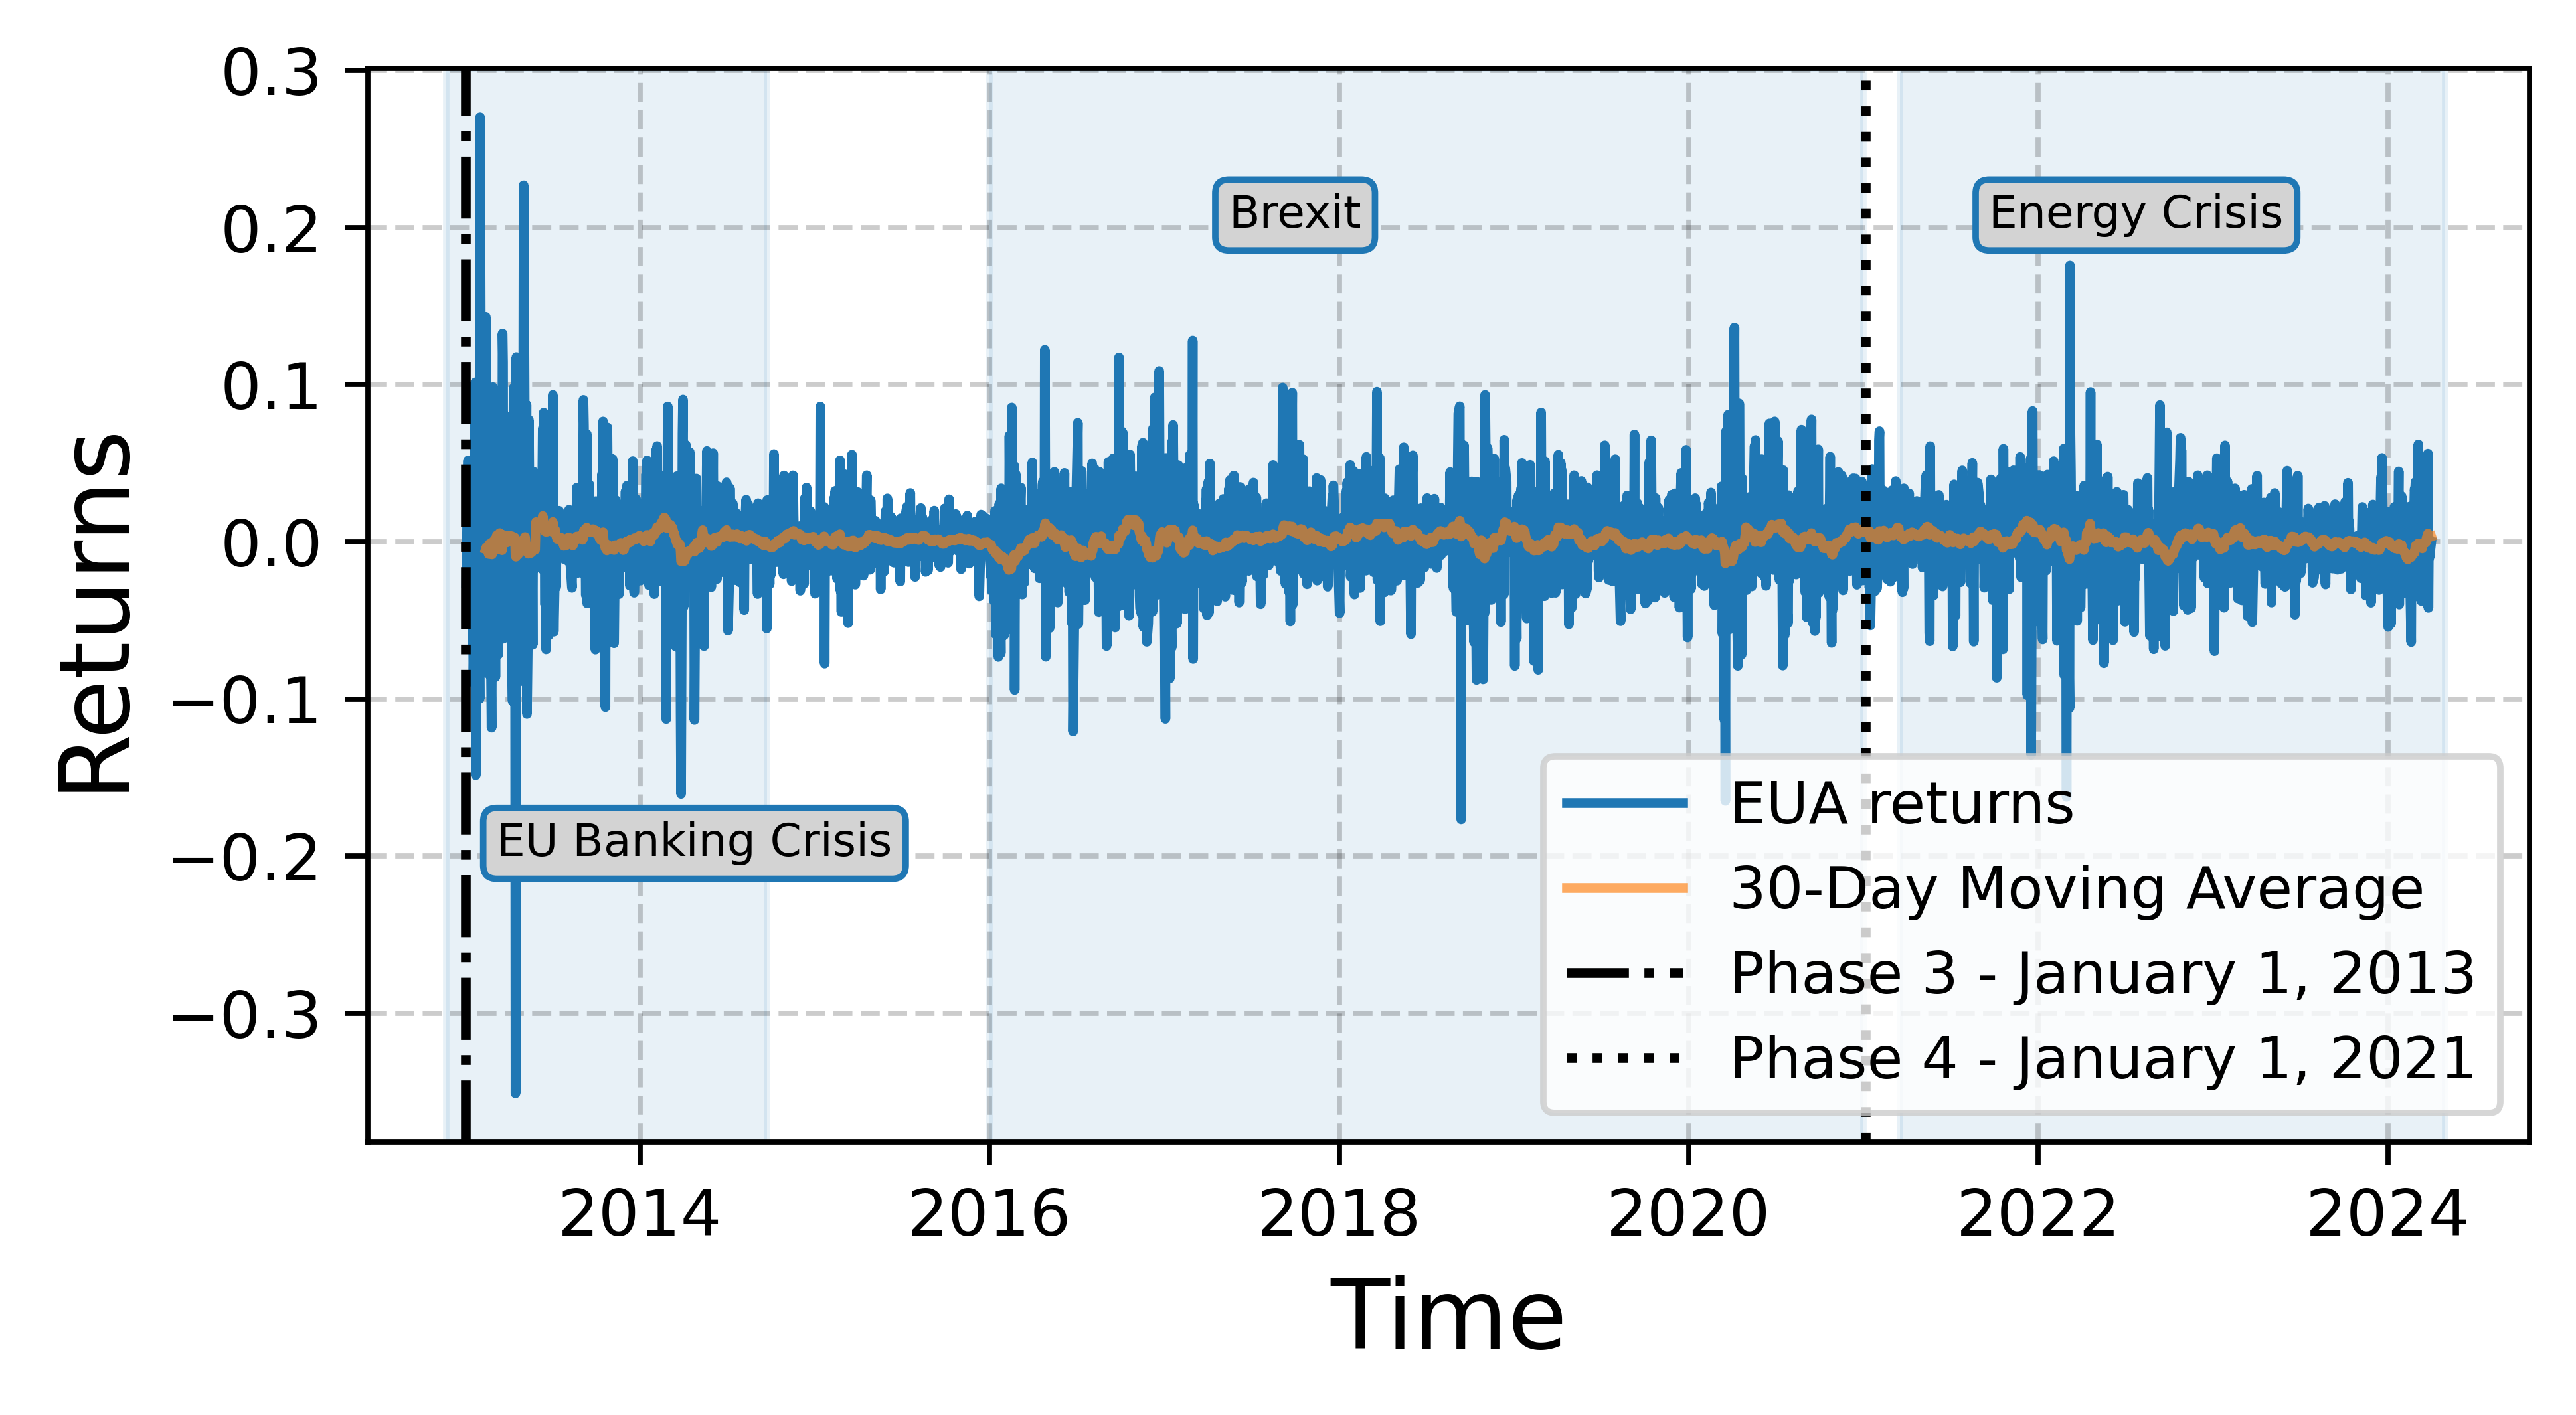

In [14]:
# Plot returns
fig, ax = plt.subplots(figsize=(6,3), dpi=700)

# EU Banking Crisis
plt.axvspan(datetime(2012, 11, 22), datetime(2014, 9, 24), color='tab:blue', alpha=0.1)
plt.annotate('EU Banking Crisis', (datetime(2014, 4, 25), -0.2), textcoords="offset points", xytext=(0,0), ha='center', fontsize=7,
             bbox=dict(boxstyle="round", edgecolor='tab:blue', facecolor='lightgray'))

# Brexit
plt.axvspan(datetime(2016, 1, 1), datetime(2020, 12, 31), color='tab:blue', alpha=0.1)
plt.annotate('Brexit', (datetime(2017, 10, 1), 0.2), textcoords="offset points", xytext=(0,0), ha='center', fontsize=7,
             bbox=dict(boxstyle="round", edgecolor='tab:blue', facecolor='lightgray'))


# Energy Crisis
plt.axvspan(datetime(2021, 3, 18), datetime(2024, 4, 30), color='tab:blue', alpha=0.1)
plt.annotate('Energy Crisis', (datetime(2022, 7, 25), 0.2), textcoords="offset points", xytext=(0,0), ha='center', fontsize=7,
             bbox=dict(boxstyle="round", edgecolor='tab:blue', facecolor='lightgray'))

ax.plot(date_r, df_r['EUA'], color ='tab:blue', label = 'EUA returns')
ax.plot(date_r, df_r['30_days'], color ='tab:orange', label = '30-Day Moving Average', alpha = 0.65)

# Add vertical lines for phases with different line styles
ax.axvline(x=Ph3_date, color='black', linestyle='-.', label='Phase 3 - January 1, 2013')  # Dash-dot line for Phase 3
ax.axvline(x=Ph4_date, color='black', linestyle=':', label='Phase 4 - January 1, 2021')  # Dotted line for Phase 4
ax.legend(loc='lower right', fontsize=9)
ax.set_ylabel('Returns', fontsize = 15)
ax.set_xlabel('Time', fontsize = 15)
# Add grid
ax.grid(axis='both', color="black", linestyle='--', alpha=0.2)

***